# Herkenning van handgeschreven cijfers

## Stijn Oomes

10 september 2020


## Importeer libraries

In [ ]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

from keras.datasets import mnist

## Importeer en toon data

In [ ]:
# img = cv.imread('digits.png')
# gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# plt.figure(figsize=(18,12))
# plt.imshow(img.max() - img);
# plt.axis('off');

# print(img.shape)

# (X_train_images, y_train_labels),(X_test_images, y_test_labels) = mnist.load_data()

(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(len(X_train),28*28).astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.reshape(len(X_test),28*28).astype('float32')
y_test = y_test.astype('float32')

In [ ]:
X_train_images.shape

(60000, 28, 28)

In [ ]:
X_test_images.shape

(10000, 28, 28)

In [ ]:
type(y_train_labels)

numpy.ndarray

In [ ]:
y_test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

## Split afbeelding in aparte cellen

In [ ]:
# cells = [np.hsplit(row,100) for row in np.vsplit(gray,50)]
# x = np.array(cells)

# print(x.shape)

## Toon 12 random cijfers

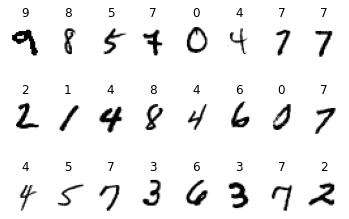

In [ ]:
# for sub in range(1, 13):
#         plt.subplot(3,4, sub)
#         i = np.random.randint(50)
#         j = np.random.randint(100)
#         plt.axis("off")
#         plt.imshow(255 - x[i][j], cmap='gray')
#         number = np.floor(i/5).astype(int)
#         plt.title('%i' % number);



for sub in range(1, 25):
        plt.subplot(3,8, sub)
        i = np.random.randint(60000)
        plt.axis("off")
        plt.imshow(255 - X_train_images[i], cmap='gray')
        plt.title(y_train_labels[i]);

## Maak aparte training en testing sets

In [ ]:
# train = x[:,:50].reshape(-1,400).astype(np.float32)
# test = x[:,50:100].reshape(-1,400).astype(np.float32)

# print(train.shape)
# print(test.shape)

## Maak labels voor training en testing sets

In [ ]:
# k = np.arange(10)
# train_labels = np.repeat(k,250)[:,np.newaxis]
# test_labels = train_labels.copy()

# print(train_labels.shape)
# print(test_labels.shape)

## Train het model op de training set

In [ ]:
X_train_images.shape

(60000, 28, 28)

In [ ]:
X_train_rawdata = X_train_images.reshape(60000,28*28)
X_test_rawdata = X_test_images.reshape(10000,28*28)

In [ ]:
type(X_train_rawdata[0][0])

numpy.uint8

In [ ]:
X_train_data = X_train_rawdata.astype('float32')
X_test_data = X_train_rawdata.astype('float32')

In [ ]:
type(X_train_data[0][0])

numpy.float32

In [ ]:
X_train_rawdata.shape

(60000, 784)

In [ ]:
y_train_labels.shape

(60000,)

In [ ]:
type(y_train_labels[0])

numpy.uint8

In [ ]:
y_train_labels_plus = y_train_labels.reshape(60000,1)

In [ ]:
y_train_labels_plus.shape

(60000, 1)

In [ ]:
y_train_labels_corrected = y_train_labels_plus.astype('float32')

In [ ]:
knn = cv.ml.KNearest_create()
knn.train(X_train[:1000,:],
          cv.ml.ROW_SAMPLE,
          y_train[:1000]
          )

True

## Pas het model toe op de testing set

In [ ]:
ret,result,neighbours,dist = knn.findNearest(X_test,k=5)

In [ ]:
result

array([[5.],
       [0.],
       [4.],
       ...,
       [5.],
       [6.],
       [9.]], dtype=float32)

## Bepaal de nauwkeurigheid van het model

In [ ]:
matches = result==y_test.reshape(10000,1)
correct = np.count_nonzero(matches)
accuracy = correct/result.size

print(accuracy)


0.8501166666666666
test


## Toon verwarringsmatrix

In [ ]:
cm = confusion_matrix(y_train_labels_corrected,result)
print(cm)

[[5791    6   23   10    7   38   33    4    4    7]
 [   0 6697   15    4    6    5    4    8    1    2]
 [ 229  427 4916   60   46   48   27  178   15   12]
 [  68  135  261 5285   15  216   14   75   36   26]
 [   9  160   22    1 5159    3   37   66    2  383]
 [ 141  119   12  662  110 4187   70   32   28   60]
 [ 220  137   37    5  135  102 5282    0    0    0]
 [  14  185   41   27  160   29    1 5667    1  140]
 [ 167  297  318  423  143  451   90  119 3675  168]
 [  34   39   34  102  704   35    8  629   16 4348]]


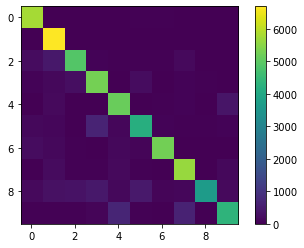

In [ ]:
plt.imshow(cm)
plt.colorbar();

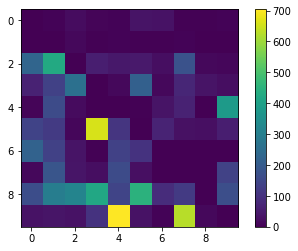

In [ ]:
for i in range(0,10):
    cm[i,i] = 0

plt.imshow(cm)
plt.colorbar();

## Toon 12 voorbeelden van fouten van het model

In [ ]:
mistakes = result!=y_test.reshape(len(y_test), 1)
mistakes = mistakes.reshape(len(mistakes))

 

index_mistake = enumerate(mistakes)
index_mistake = [index for index, mistake in index_mistake if mistake == True]

NameError: ignored

In [ ]:
np.count_nonzero(mistakes)

8993

NameError: ignored

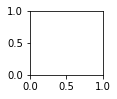

In [ ]:
# TODO: selecteer voorbeeld uit de fouten!

 

for sub in range(1, 13):
        plt.subplot(3,4, sub)
        i = np.random.choice(index_mistake)
        
        plt.axis("off")
        plt.imshow(255 - X_test_raw[i], cmap='gray')
        number = result[i]
        plt.title('%i' % number);